In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use("seaborn")

In [2]:
with open("kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [4]:
with open("training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [5]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [6]:
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df.shape

(494021, 43)

Text(0.5, 1.0, 'Count of Different Targets')

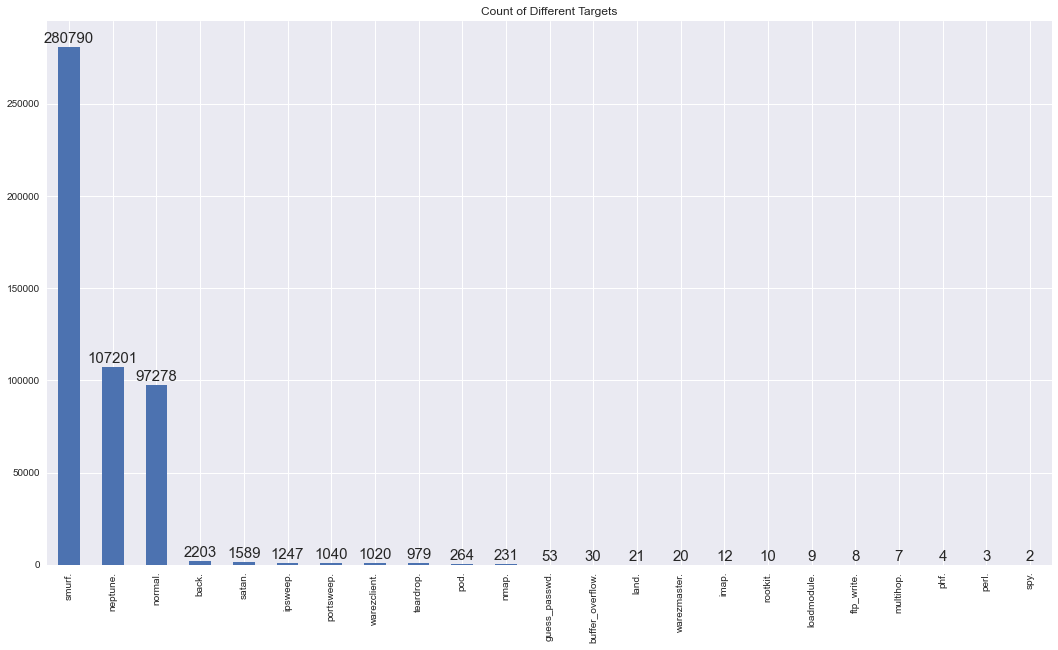

In [8]:
plt.figure(figsize=(18,10))
plots = df['target'].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Count of Different Targets")

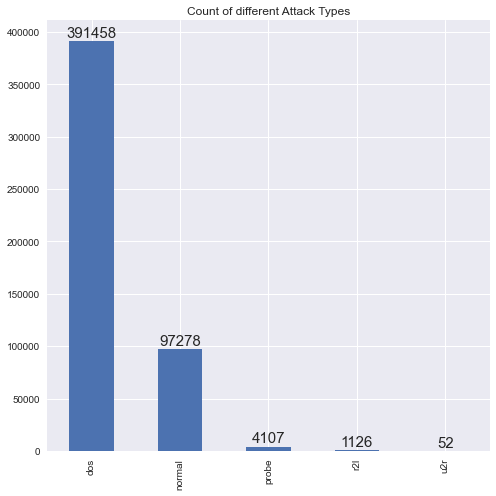

In [9]:
plt.figure(figsize=(7,7))
plots = df['Attack Type'].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(bar.get_height(),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Count of different Attack Types")
plt.tight_layout()

In [10]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Here, we can see that the dataset has 5 categorical attributes in total.<br/>
**protocol_type, flag, service, target, AttackType**

<AxesSubplot:>

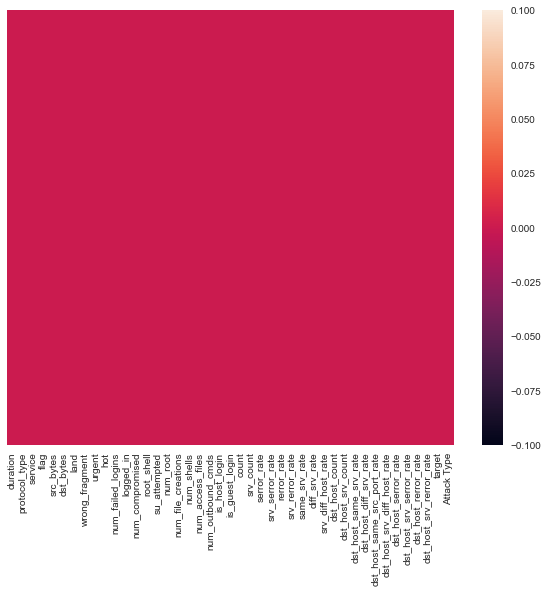

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False)

This shows that no null values are present in the dataset.

### DATA PREPROCESSING

#### CATEGORICAL FEATURES DISTRIBUTION

In [12]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

Text(0.5, 0.98, 'Analysing the categorical attributes')

<Figure size 1080x576 with 0 Axes>

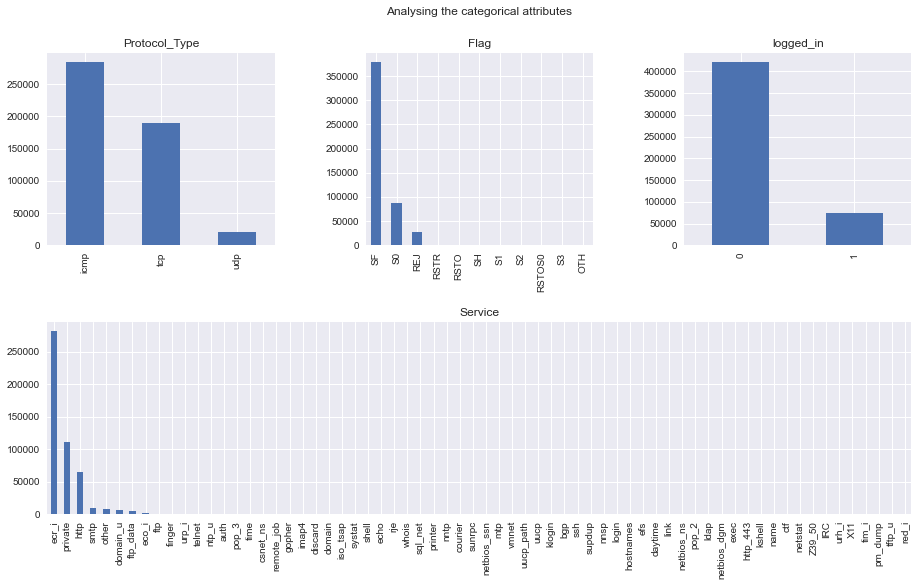

In [13]:
plt.figure(figsize = (15,8))
fig, axs = plt.subplots(ncols=2, nrows=2,figsize = (15,8))
gs = axs[1, 0].get_gridspec()
plt.subplot(2,3,1)
bar_graph('protocol_type')
plt.title('Protocol_Type')
plt.subplot(2,3,2)
bar_graph('flag')
plt.title('Flag')
plt.subplot(2,3,3)
bar_graph('logged_in')
plt.title('logged_in')
for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])
bar_graph('service')
plt.title('Service')
fig.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.suptitle("Analysing the categorical attributes")

TARGET FEATURE DISTRIBUTION

Text(0.5, 1.0, 'Attack Type')

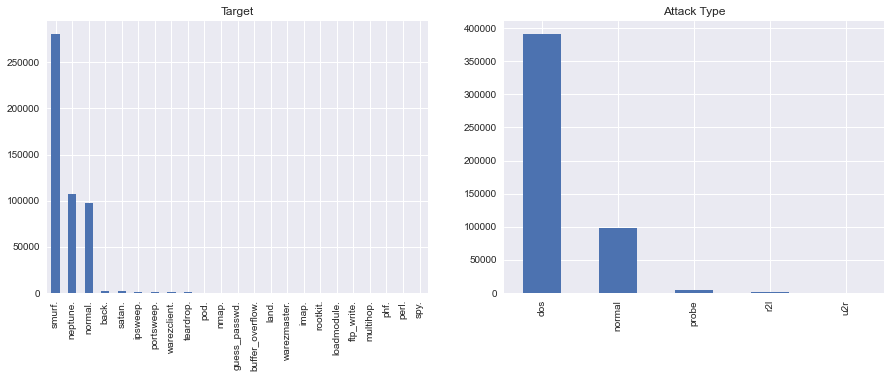

In [14]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
bar_graph('target')
plt.title('Target')
plt.subplot(1,2,2)
bar_graph('Attack Type')
plt.title('Attack Type')

Attack Type(The attack types grouped by attack, it's what we will predict)

In [15]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

### DATA CORRELATION

#### Feature Selection using correlation

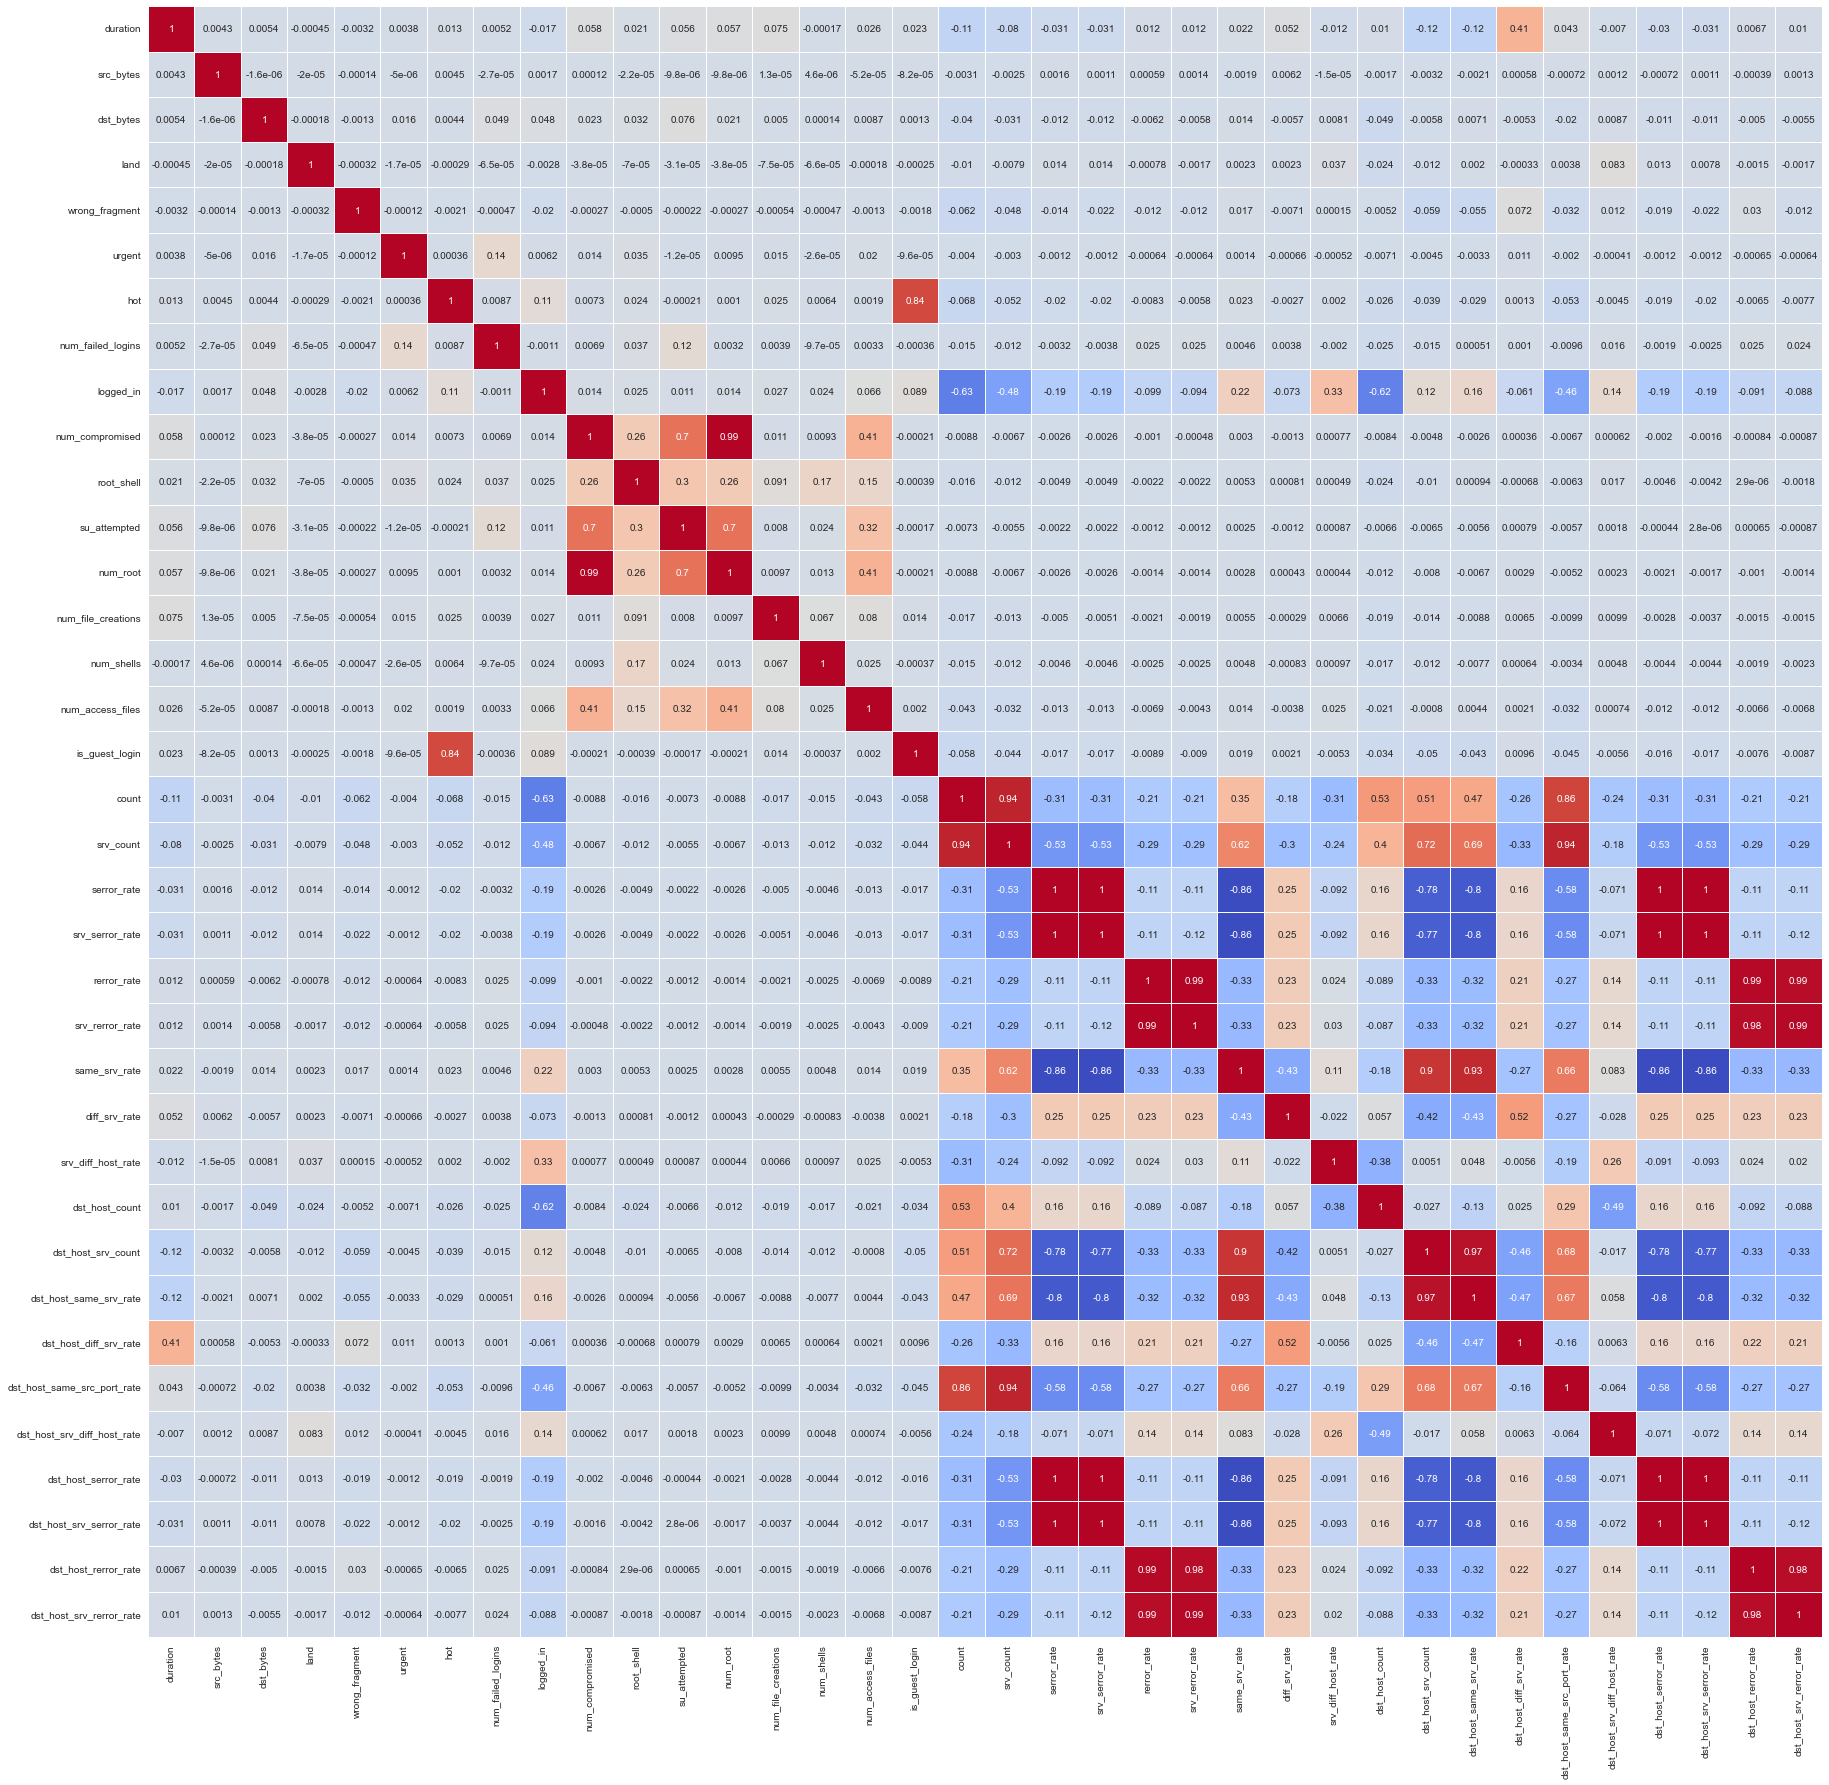

In [16]:
df = df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]]
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,cmap='coolwarm',annot=True,linewidths=.5, cbar=False)
plt.show()

In [17]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737942

In [18]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272552

In [19]:
df['srv_count'].corr(df['count'])

0.9436670688882602

In [20]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818258

In [21]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572954081

In [22]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173372515

In [23]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110593

In [24]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.927808034269101

In [25]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324231

In [26]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783239

In [27]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.998672968010501

In [28]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373953

In [29]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679238

In [30]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850208

In [31]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924955924

In [32]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308904

In [33]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751091

In [34]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845588

In [35]:
df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [36]:
df.shape

(494021, 33)

In [37]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

### FEATURE MAPPING

In [38]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [39]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [40]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [41]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [42]:
df.drop('service',axis = 1,inplace= True)

### Splitting the Dataset

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [44]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

# sc = MinMaxScaler()
# X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [45]:
df.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'Attack Type'],
      dtype='object')

### Tree based feature selection and random forest classification

Feature ranking:
1. feature 18 (0.235023)-count
2. feature 4 (0.135482)-dst_bytes
3. feature 10 (0.124639)-logged_in
4. feature 1 (0.067017)-protocol_type
5. feature 25 (0.057729)-dst_host_count
6. feature 3 (0.056100)-src_bytes
7. feature 29 (0.051110)-dst_host_srv_diff_host_rate
8. feature 28 (0.041688)-dst_host_same_src_port_rate
9. feature 19 (0.037703)-srv_count
10. feature 23 (0.037102)-diff_srv_rate
11. feature 22 (0.030372)-same_srv_rate
12. feature 27 (0.028243)-dst_host_diff_srv_rate
13. feature 24 (0.022350)-srv_diff_host_rate
14. feature 26 (0.019206)-dst_host_srv_count
15. feature 2 (0.016204)-flag
16. feature 11 (0.009804)-num_compromised
17. feature 20 (0.009645)-serror_rate
18. feature 8 (0.006857)-hot
19. feature 0 (0.005726)-duration
20. feature 6 (0.003954)-wrong_fragment
21. feature 21 (0.003038)-rerror_rate
22. feature 17 (0.000612)-is_guest_login
23. feature 9 (0.000154)-num_failed_logins
24. feature 12 (0.000082)-root_shell
25. feature 14 (0.000055)-num_file_crea

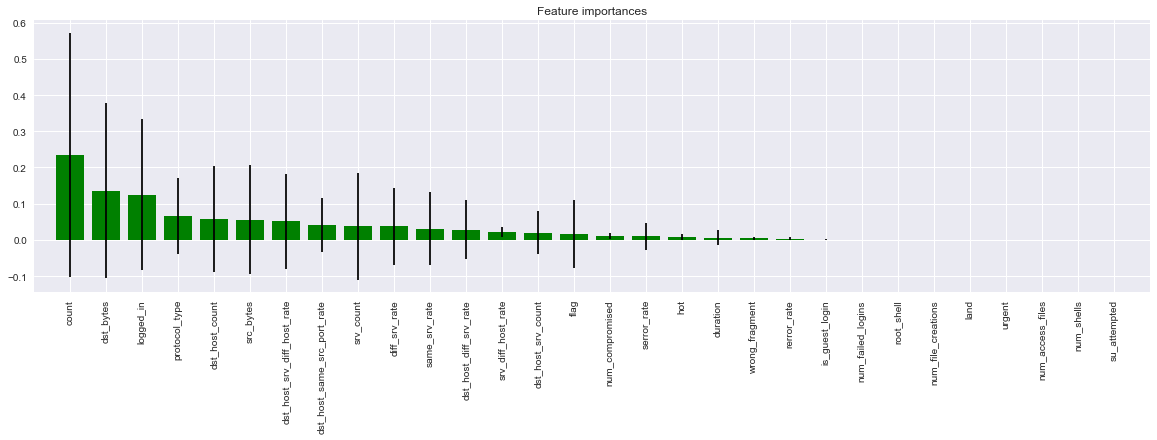

In [46]:
from sklearn.ensemble import RandomForestClassifier


clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,Y_train)

clf_rf_1 = RandomForestClassifier()      
clr_rf_1 = clf_rf_1.fit(X_train,Y_train)
importances = clr_rf_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),end='-')
    print(X_train.columns[indices[f]])

# Plot the feature importances of the forest

plt.figure(1, figsize=(20, 5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])

plt.show()

In [47]:
X_train.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'],
      dtype='object')

In [48]:
from sklearn.metrics import accuracy_score
        
test_accuracies = []
t = X_train
t_2 = X_test

to_be_removed = []
for f in range(30):
    to_be_removed.append(X_train.columns[indices[f]])

for i in range(30,0,-1):
    clf_rf = RandomForestClassifier(random_state=43) 
    clr_rf = clf_rf.fit(t,Y_train)
    test_ac = accuracy_score(Y_test,clf_rf.predict(t_2))
    test_accuracies.append(test_ac)
    t = t.drop(to_be_removed[i-1],axis=1)
    t_2 = t_2.drop(to_be_removed[i-1],axis=1)

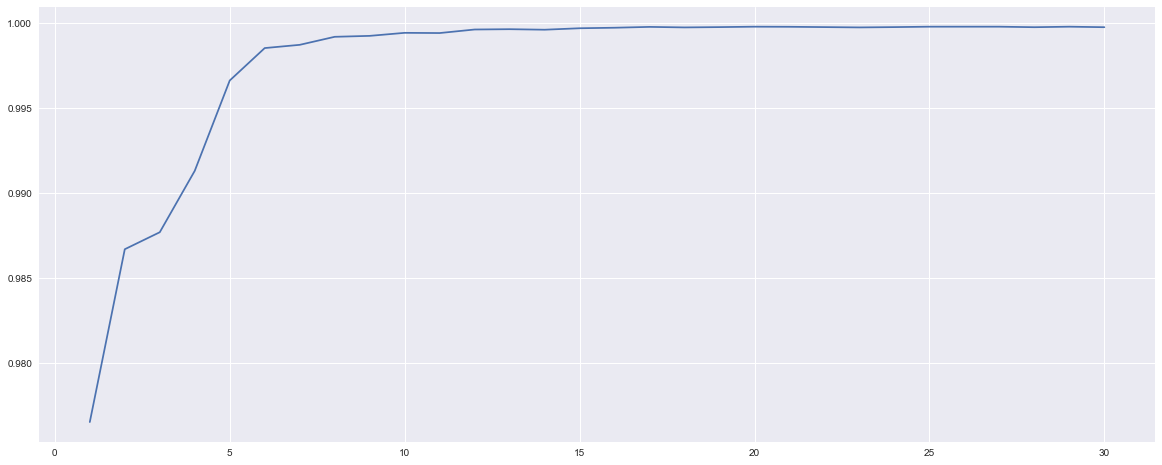

In [49]:
plt.style.use("seaborn")
plt.figure(figsize=(20,8))
x_place = [30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
plt.plot(x_place,test_accuracies)
plt.show()

In [50]:
for i in range(29,-1,-1):
    print(str(i+1)+" - "+str(test_accuracies[29-i]))

30 - 0.9997362400093236
29 - 0.9997669097756813
28 - 0.9997362400093236
27 - 0.9997669097756813
26 - 0.9997669097756813
25 - 0.9997669097756813
24 - 0.9997423739625951
23 - 0.9997239721027805
22 - 0.9997423739625951
21 - 0.9997607758224097
20 - 0.9997669097756813
19 - 0.9997423739625951
18 - 0.9997239721027805
17 - 0.9997546418691382
16 - 0.9997055702429659
15 - 0.9996749004766081
14 - 0.9995890251308066
13 - 0.9996196948971643
12 - 0.9996012930373497
11 - 0.9993927386261171
10 - 0.9994050065326603
9 - 0.9992271218877855
8 - 0.9991719163083416
7 - 0.9986996019064327
6 - 0.9985094493550148
5 - 0.9966017898875646
4 - 0.9912897863544076
3 - 0.9876768878774681
2 - 0.9866770534942065
1 - 0.9765130929232582


We can see that after around using 16 features that accuracy of the system changes very little, so we will use thos 16 features

In [51]:
X_train = X_train.drop(['hot','num_compromised','duration','wrong_fragment','rerror_rate','is_guest_login','num_failed_logins',
                        'root_shell','num_file_creations','num_access_files','land','num_shells','urgent','su_attempted',]
                       ,axis=1)
X_test = X_test.drop(['hot','num_compromised','duration','wrong_fragment','rerror_rate','is_guest_login','num_failed_logins',
                        'root_shell','num_file_creations','num_access_files','land','num_shells','urgent','su_attempted',]
                       ,axis=1)

## Modeling

In [52]:
acc_train = []
acc_test = []
pres_train = []
pres_test = []
rec_train = []
rec_test = []
f1_train = []
f1_test = []
train_time = []
test_time = []
confusion_matrixs = []

In [53]:
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def classification_model_report(model,name,n):
  #Fit the model:
  model = model.fit(X_train,Y_train)
  
  #Make predictions on training set:
  start_time = time.time()
  pred_train = model.predict(X_train)
  end_time = time.time()
  train_time_model = end_time-start_time
  train_time.append(train_time_model)

  start_time = time.time()
  pred_test = model.predict(X_test)
  end_time = time.time()
  test_time_model = end_time-start_time
  test_time.append(test_time_model)
  
  #Print accuracy
  ac_train = accuracy_score(Y_train,pred_train)
  ac_test = accuracy_score(Y_test,pred_test)
  acc_train.append(ac_train)
  acc_test.append(ac_test)
  

  #Print precision
  pr_train = precision_score(Y_train, pred_train,average="micro")
  pr_test = precision_score(Y_test, pred_test,average="micro")
  pres_train.append(pr_train)
  pres_test.append(pr_test)
  
  #Print recall
  re_train = recall_score(Y_train, pred_train,average="micro")
  re_test = recall_score(Y_test, pred_test,average="micro")
  rec_train.append(re_train)
  rec_test.append(re_test)
  
  #Print f1_score
  f_train = f1_score(Y_train, pred_train,average="micro")
  f_test = f1_score(Y_test, pred_test,average="micro")
  f1_train.append(f_train)
  f1_test.append(f_test)

  #confusion matrix
  cm = confusion_matrix(Y_test,pred_test) 
  confusion_matrixs.append(cm)

  if n==1:
    print("|| "+name+" ||\n")
    print("------------------------------------------------------------------------------------------------------------------------------\n")
    print("Trainning\n")
    print("Time: ",train_time_model, end=" || ")
    print("Accuracy: ",round(ac_train,5), end=" || ")
    print("Precision: ",round(pr_train,5), end=" || ")
    print("Recall: ",round(re_train,5), end=" || ")
    print("f1_score: ",round(f_train,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
    print("Testing\n")
    print("Time: ",test_time_model, end=" || ")
    print("Accuracy: ",round(ac_test,5), end=" || ")
    print("Precision: ",round(pr_test,5), end=" || ")
    print("Recall: ",round(re_test,5), end=" || ")
    print("f1_score: ",round(f_test,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
model_name = ['Gaussian NaiveBayes','Decision Tree','RandomForest','SVM','LogisticRegression','GradientBoosting']
model1 = GaussianNB()
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model3 = RandomForestClassifier(n_estimators=30)
model4 = SVC(gamma = 'scale')
model5 = LogisticRegression(max_iter=1200000)
model6 = GradientBoostingClassifier(random_state=0)
models = [model1,model2,model3,model4,model5,model6]

In [57]:
classification_model_report(models[0],model_name[0],0)

In [58]:
classification_model_report(models[1],model_name[1],0)

In [59]:
classification_model_report(models[2],model_name[2],0)

In [60]:
classification_model_report(models[3],model_name[3],0)

In [61]:
classification_model_report(models[4],model_name[4],0)

In [62]:
classification_model_report(models[5],model_name[5],0)

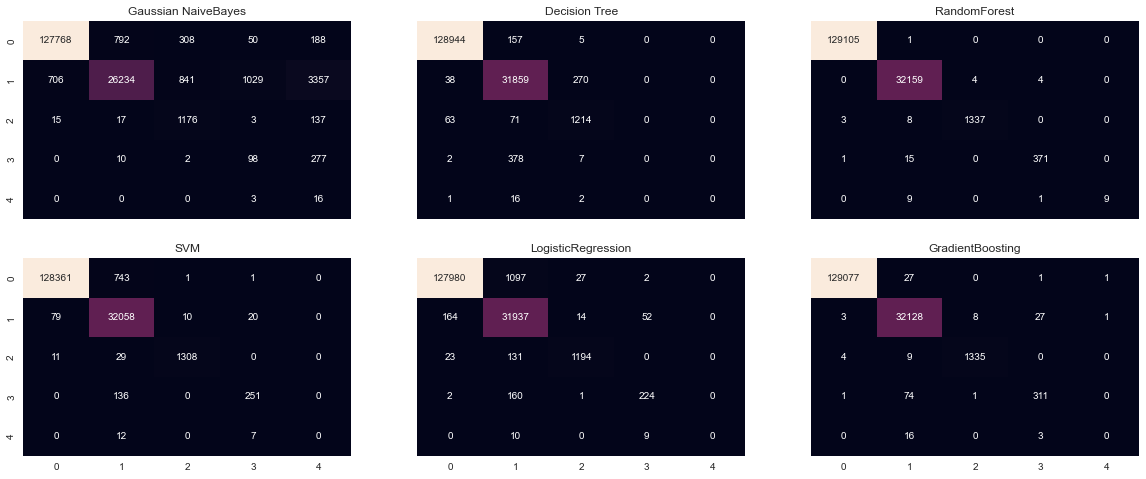

In [63]:
plt.subplots(ncols=3, nrows=2,figsize=(20,8),sharey=True,sharex=True)
for i in range(1,7):
    plt.subplot(2,3,i)
    sns.heatmap(confusion_matrixs[i-1],annot=True,fmt="d",cbar=False)
    plt.title(model_name[i-1])

In [64]:
for i in range(len(model_name)):
    print(model_name[i]+" : "+str(acc_test[i]*100))

Gaussian NaiveBayes : 95.25538714446074
Decision Tree : 99.38047071957405
RandomForest : 99.9717838149509
SVM : 99.35654830181504
LogisticRegression : 98.96213510645477
GradientBoosting : 99.89204242242083


In [65]:
print(acc_train)
print(pres_train)
print(rec_train)
print(f1_train)

[0.9525671160202299, 0.9939001915442576, 0.9999969787971987, 0.9934681595436775, 0.9897460376925261, 0.9991570844184486]
[0.9525671160202299, 0.9939001915442576, 0.9999969787971987, 0.9934681595436775, 0.9897460376925261, 0.9991570844184486]
[0.9525671160202299, 0.9939001915442576, 0.9999969787971987, 0.9934681595436775, 0.9897460376925261, 0.9991570844184486]
[0.9525671160202299, 0.9939001915442576, 0.9999969787971987, 0.9934681595436775, 0.9897460376925261, 0.9991570844184486]


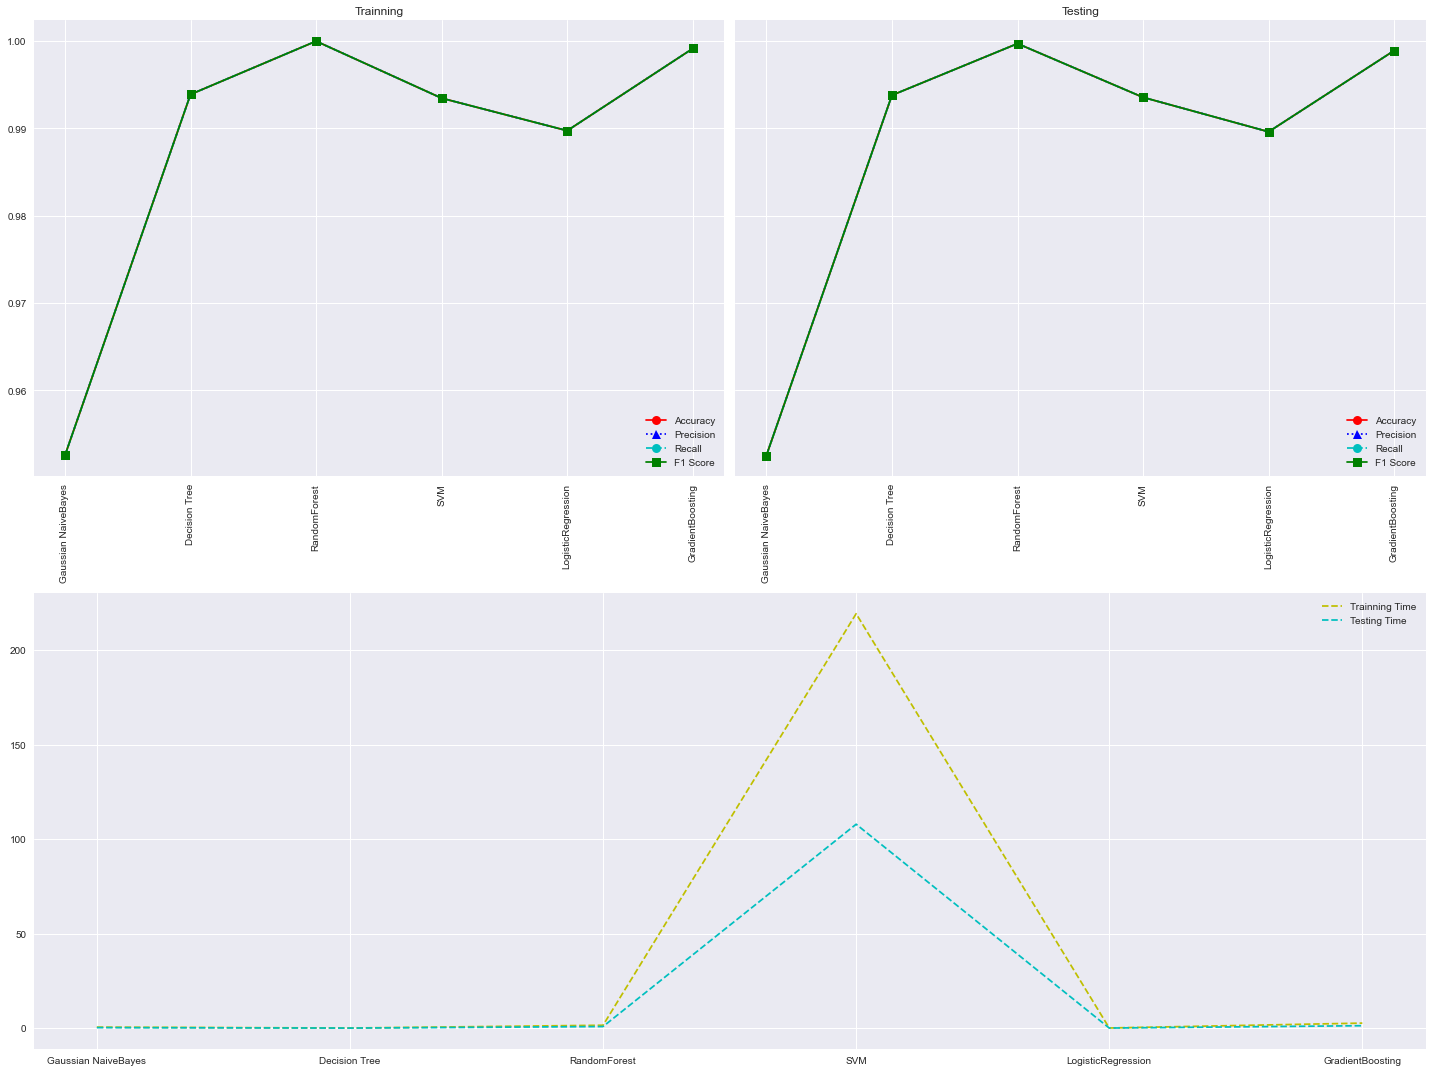

In [66]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,15),sharey=True)
gs = axs[1, 0].get_gridspec()
plt.subplot(2,2,1)
plt.plot(model_name,acc_train,'r',marker='o', markersize=9)
plt.plot(model_name,pres_train,'b:',marker='^', markersize=9)
plt.plot(model_name,rec_train,'c--',marker='o', markersize=9)
plt.plot(model_name,f1_train,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Trainning")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

plt.subplot(2,2,2)
plt.plot(model_name,acc_test,'r',marker='o', markersize=9)
plt.plot(model_name,pres_test,'b:',marker='^', markersize=9)
plt.plot(model_name,rec_test,'c--',marker='o', markersize=9)
plt.plot(model_name,f1_test,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Testing")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])

plt.plot(model_name,train_time,'y--')
plt.plot(model_name,test_time,'c--')
plt.legend(['Trainning Time','Testing Time'],loc ="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
def estimate_creator(l):
    estm = []
    for i in l:
        estm.append((model_name[i],models[i]))
    return estm

In [68]:
from sklearn.ensemble import StackingClassifier

l = [[0,1,2],[1,2,5],[0,2,5]]

estimator_list = []
for i in range(len(l)):
    estimator_list.append(estimate_creator(l[i]))

# Build stack model
stack_model_list = []
for i in range(len(l)):
    stack_model_list.append(StackingClassifier(estimators=estimator_list[i], final_estimator=LogisticRegression()))

stack_model_name = []
for i in range(len(l)):
    stack_model_name.append(str("Meta Model "+str(i+1)))

In [69]:
stack_acc_train = []
stack_acc_test = []
stack_pres_train = []
stack_pres_test = []
stack_rec_train = []
stack_rec_test = []
stack_f1_train = []
stack_f1_test = []
stack_train_time = []
stack_test_time = []
stack_confusion_matrixs = []
test_prediction = []
train_prediction = []

In [70]:
def stack_classification_model_report(model,name,n):
  #Fit the model:
  model = model.fit(X_train,Y_train)
  
  #Make predictions on training set:
  start_time = time.time()
  pred_train = model.predict(X_train)
  end_time = time.time()
  train_time_model = end_time-start_time
  stack_train_time.append(train_time_model)
  train_prediction.append(pred_train)

  start_time = time.time()
  pred_test = model.predict(X_test)
  end_time = time.time()
  test_time_model = end_time-start_time
  stack_test_time.append(test_time_model)
  test_prediction.append(pred_test)
  
  #Print accuracy
  ac_train = accuracy_score(Y_train,pred_train)
  ac_test = accuracy_score(Y_test,pred_test)
  stack_acc_train.append(ac_train)
  stack_acc_test.append(ac_test)
  
  #Print precision
  pr_train = precision_score(Y_train, pred_train,average="macro")
  pr_test = precision_score(Y_test, pred_test,average="macro")
  stack_pres_train.append(pr_train)
  stack_pres_test.append(pr_test)
  
  #Print recall
  re_train = recall_score(Y_train, pred_train,average="macro")
  re_test = recall_score(Y_test, pred_test,average="macro")
  stack_rec_train.append(re_train)
  stack_rec_test.append(re_test)
  
  #Print f1_score
  f_train = f1_score(Y_train, pred_train,average="macro")
  f_test = f1_score(Y_test, pred_test,average="macro")
  stack_f1_train.append(f_train)
  stack_f1_test.append(f_test)

  #confusion matrix
  cm = confusion_matrix(Y_test,pred_test) 
  stack_confusion_matrixs.append(cm)

  if n==1:
    print("|| "+name+" ||\n")
    print("------------------------------------------------------------------------------------------------------------------------------\n")
    print("Trainning\n")
    print("Time: ",train_time_model, end=" || ")
    print("Accuracy: ",round(ac_train,5), end=" || ")
    print("Precision: ",round(pr_train,5), end=" || ")
    print("Recall: ",round(re_train,5), end=" || ")
    print("f1_score: ",round(f_train,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")
    print("Testing\n")
    print("Time: ",test_time_model, end=" || ")
    print("Accuracy: ",round(ac_test,5), end=" || ")
    print("Precision: ",round(pr_test,5), end=" || ")
    print("Recall: ",round(re_test,5), end=" || ")
    print("f1_score: ",round(f_test,5))
    print("\n------------------------------------------------------------------------------------------------------------------------------\n")

In [71]:
stack_classification_model_report(stack_model_list[0],stack_model_name[0],0)

In [72]:
stack_classification_model_report(stack_model_list[1],stack_model_name[1],0)

In [73]:
stack_classification_model_report(stack_model_list[2],stack_model_name[2],0)

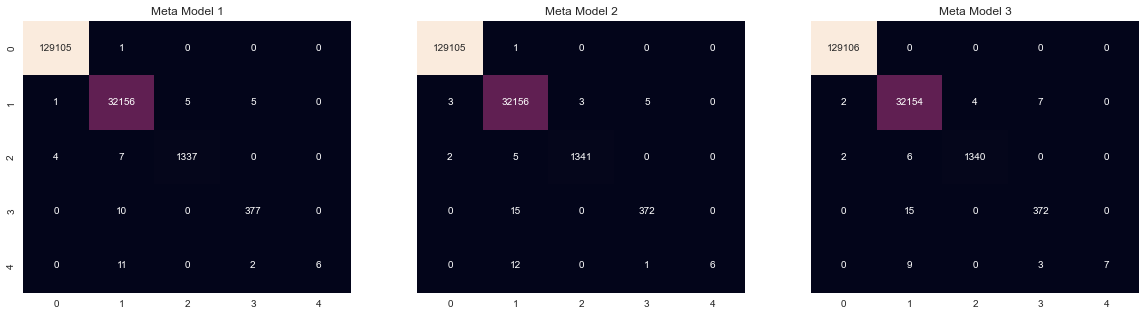

In [74]:
plt.subplots(ncols=3, nrows=1,figsize=(20,5),sharey=True,sharex=True)
for i in range(len(l)):
    plt.subplot(1,3,i+1)
    sns.heatmap(stack_confusion_matrixs[i],annot=True,fmt="d",cbar=False)
    plt.title(stack_model_name[i])

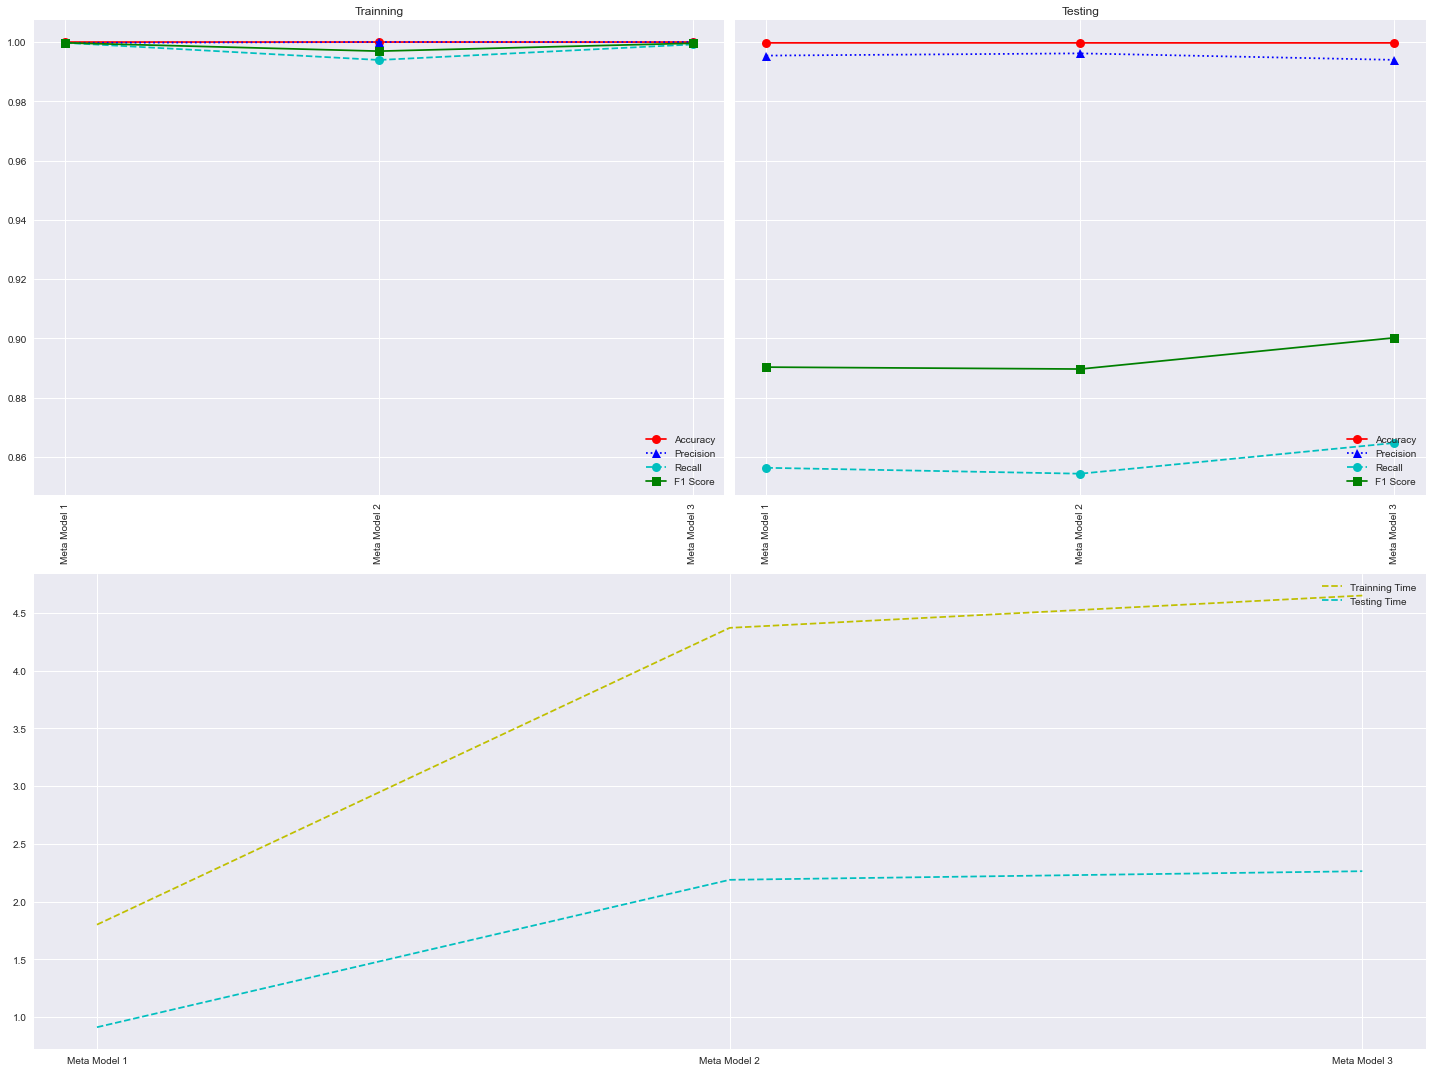

In [75]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20,15),sharey=True)
gs = axs[1, 0].get_gridspec()
plt.subplot(2,2,1)
plt.plot(stack_model_name,stack_acc_train,'r',marker='o', markersize=9)
plt.plot(stack_model_name,stack_pres_train,'b:',marker='^', markersize=9)
plt.plot(stack_model_name,stack_rec_train,'c--',marker='o', markersize=9)
plt.plot(stack_model_name,stack_f1_train,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Trainning")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

plt.subplot(2,2,2)
plt.plot(stack_model_name,stack_acc_test,'r',marker='o', markersize=9)
plt.plot(stack_model_name,stack_pres_test,'b:',marker='^', markersize=9)
plt.plot(stack_model_name,stack_rec_test,'c--',marker='o', markersize=9)
plt.plot(stack_model_name,stack_f1_test,'g',marker='s', markersize=9)
plt.xticks(rotation=90)
plt.title("Testing")
plt.grid(True)
plt.legend(['Accuracy','Precision','Recall','F1 Score'],loc ="lower right")

for ax in axs[1,:]:
    ax.remove()
axbig = fig.add_subplot(gs[1,:])

plt.plot(stack_model_name,stack_train_time,'y--')
plt.plot(stack_model_name,stack_test_time,'c--')
plt.legend(['Trainning Time','Testing Time'],loc ="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
for i in range(len(stack_model_name)):
    print(stack_model_name[i]+" : "+str(stack_acc_test[i]*100))

Meta Model 1 : 99.9717838149509
Meta Model 2 : 99.97117041962375
Meta Model 3 : 99.9705570242966


In [77]:
creator = {}
for i in range(len(l)):
    creator[stack_model_name[i]] = train_prediction[i]

df_ann = pd.DataFrame(creator)
df_ann.head()

,Meta Model 1,Meta Model 2,Meta Model 3
0,normal,normal,normal
1,dos,dos,dos
2,dos,dos,dos
3,normal,normal,normal
4,dos,dos,dos


In [78]:
pmap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df_ann['Meta Model 1'] = df_ann['Meta Model 1'].map(pmap)
df_ann['Meta Model 2'] = df_ann['Meta Model 2'].map(pmap)
df_ann['Meta Model 3'] = df_ann['Meta Model 3'].map(pmap)

In [79]:
### Creating dataset for ANN Model
creator = {}
for i in range(len(l)):
    creator[stack_model_name[i]] = test_prediction[i]

df_ann_test = pd.DataFrame(creator)
df_ann_test.head()

,Meta Model 1,Meta Model 2,Meta Model 3
0,dos,dos,dos
1,dos,dos,dos
2,dos,dos,dos
3,normal,normal,normal
4,dos,dos,dos


In [80]:
pmap = {'dos':0,'normal':1,'probe':2,'r2l':3,'u2r':4}
df_ann_test['Meta Model 1'] = df_ann_test['Meta Model 1'].map(pmap)
df_ann_test['Meta Model 2'] = df_ann_test['Meta Model 2'].map(pmap)
df_ann_test['Meta Model 3'] = df_ann_test['Meta Model 3'].map(pmap)

In [81]:
df_ann_test.head()
# df_ann_test.dtypes

,Meta Model 1,Meta Model 2,Meta Model 3
0,0,0,0
1,0,0,0
2,0,0,0
3,1,1,1
4,0,0,0


In [82]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [83]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(3,input_dim =3,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [84]:
ann_model = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

In [85]:
scaler = StandardScaler()
df_ann = scaler.fit_transform(df_ann)
df_ann_test = scaler.transform(df_ann_test)
ann_model.fit(df_ann, Y_train.values.ravel())


Epoch 1/100
5172/5172 [==============================] - 12s 2ms/step - loss: 0.3909 - accuracy: 0.8802
Epoch 2/100
5172/5172 [==============================] - 12s 2ms/step - loss: 0.0665 - accuracy: 0.9893
Epoch 3/100
5172/5172 [==============================] - 11s 2ms/step - loss: 0.0504 - accuracy: 0.9893 0s - los
Epoch 4/100
5172/5172 [==============================] - 11s 2ms/step - loss: 0.0484 - accuracy: 0.9893
Epoch 5/100
5172/5172 [==============================] - 10s 2ms/step - loss: 0.0482 - accuracy: 0.9893
Epoch 6/100
5172/5172 [==============================] - 10s 2ms/step - loss: 0.0481 - accuracy: 0.9893 0s -
Epoch 7/100
5172/5172 [==============================] - 10s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 8/100
5172/5172 [==============================] - 10s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 9/100
5172/5172 [==============================] - 10s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 10/100
5172/5172 [==========================

5172/5172 [==============================] - 9s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 80/100
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 81/100
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 82/100
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 83/100
5172/5172 [==============================] - 11s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 84/100
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 85/100
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 86/100
5172/5172 [==============================] - 9s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 87/100
5172/5172 [==============================] - 8s 2ms/step - loss: 0.0481 - accuracy: 0.9893
Epoch 88/100
5172/5172 [==============================] - 8s 2ms/step - loss

In [86]:
Y_train_pred = ann_model.predict(df_ann)

In [94]:
ann_acc_train = accuracy_score(Y_train,Y_train_pred)

In [95]:
Y_test_pred = ann_model.predict(df_ann_test)
ann_acc_test = accuracy_score(Y_test,Y_test_pred)

In [99]:
ann_pr_train = precision_score(Y_train,Y_train_pred,average="macro")
ann_pr_test = precision_score(Y_test, Y_test_pred,average="macro")

In [98]:
ann_re_train = recall_score(Y_train,Y_train_pred,average="macro")
ann_re_test = recall_score(Y_test, Y_test_pred,average="macro")

In [101]:
ann_f_train = f1_score(Y_train, Y_train_pred,average="macro")
ann_f_test = f1_score(Y_test, Y_test_pred,average="macro")

In [89]:
creator_train = {}
creator_train['Model'] = model_name
creator_train['Accuracy'] = acc_train
creator_train['Precision'] = pres_train
creator_train['Recall'] = rec_train
creator_train['F1 Score'] = f1_train
training_ML_models = pd.DataFrame(creator_train)
training_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Gaussian NaiveBayes,0.952567,0.952567,0.952567,0.952567
1,Decision Tree,0.993900,0.993900,0.993900,0.993900
2,RandomForest,0.999997,0.999997,0.999997,0.999997
3,SVM,0.993468,0.993468,0.993468,0.993468
4,LogisticRegression,0.989746,0.989746,0.989746,0.989746
5,GradientBoosting,0.999157,0.999157,0.999157,0.999157


In [90]:
creator_test = {}
creator_test['Model'] = model_name
creator_test['Accuracy'] = acc_test
creator_test['Precision'] = pres_test
creator_test['Recall'] = rec_test
creator_test['F1 Score'] = f1_test
testing_ML_models = pd.DataFrame(creator_test)
testing_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Gaussian NaiveBayes,0.952554,0.952554,0.952554,0.952554
1,Decision Tree,0.993805,0.993805,0.993805,0.993805
2,RandomForest,0.999718,0.999718,0.999718,0.999718
3,SVM,0.993565,0.993565,0.993565,0.993565
4,LogisticRegression,0.989621,0.989621,0.989621,0.989621
5,GradientBoosting,0.998920,0.998920,0.998920,0.998920


In [91]:
stack_creator_train = {}
stack_creator_train['Model'] = stack_model_name
stack_creator_train['Accuracy'] = stack_acc_train
stack_creator_train['Precision'] = stack_pres_train
stack_creator_train['Recall'] = stack_rec_train
stack_creator_train['F1 Score'] = stack_f1_train
stack_training_ML_models = pd.DataFrame(stack_creator_train)
stack_training_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Meta Model 1,0.999988,0.999725,0.999720,0.999722
1,Meta Model 2,0.999994,0.999996,0.993936,0.996920
2,Meta Model 3,0.999985,0.999992,0.999182,0.999586


In [92]:
stack_creator_test = {}
stack_creator_test['Model'] = stack_model_name
stack_creator_test['Accuracy'] = stack_acc_test
stack_creator_test['Precision'] = stack_pres_test
stack_creator_test['Recall'] = stack_rec_test
stack_creator_test['F1 Score'] = stack_f1_test
stack_testing_ML_models = pd.DataFrame(stack_creator_test)
stack_testing_ML_models

,Model,Accuracy,Precision,Recall,F1 Score
0,Meta Model 1,0.999718,0.995421,0.856288,0.890272
1,Meta Model 2,0.999712,0.996166,0.854297,0.889625
2,Meta Model 3,0.999706,0.993977,0.864665,0.900162


In [102]:
ann_creator = {}
ann_creator['ANN'] = ['Trainning','Testing']
ann_creator['Accuracy'] = [ann_acc_train,ann_acc_test]
ann_creator['Precision'] = [ann_pr_train,ann_pr_test]
ann_creator['Recall'] = [ann_re_train,ann_re_test]
ann_creator['F1 Score'] = [ann_f_train,ann_f_test]
ann_models = pd.DataFrame(ann_creator)
ann_models

,ANN,Accuracy,Precision,Recall,F1 Score
0,Trainning,0.989329,0.389711,0.399997,0.394718
1,Testing,0.989229,0.389655,0.399992,0.394686


We can see tha meta Model 1 gives the best accuracy in testing. Thus, is the model we use, which is a combination of Decision Tree, Random Forest and Gradient Boosting.